#02 Neural Network Classification with PyTorch



Resources :
* https://youtu.be/Z_ikDlimN6A?list=PLlx-Yw-SvHWrFWBUF2OyV064Gy9gayKU4


In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_sample = 1000

X,y = make_circles(n_sample,
                  noise =0.03,
                  random_state=42)

In [3]:
print(f"First 5 samples of X: \n {X[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [4]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                       "X2": X[:, 1],
                      "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


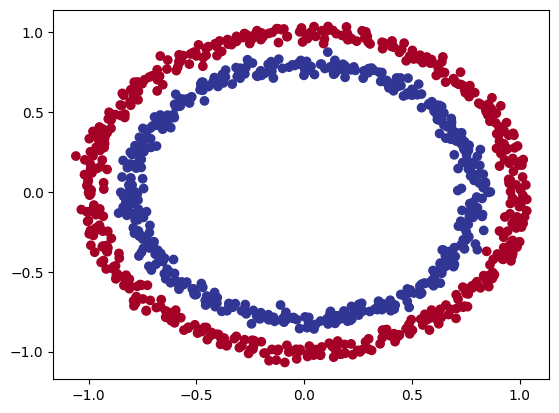

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

## 1.1 Check Input and Output shapes

In [6]:
print(f"The value of one sample of X : {X[0]} and same of y : {y[0]}")
print(f"Shapes for one sample of X: {X[0].shape} and same of y : {y[0].shape}")


The value of one sample of X : [0.75424625 0.23148074] and same of y : 1
Shapes for one sample of X: (2,) and same of y : ()


##1.2 Turn Data into Tensor and create train and test split

In [7]:
import torch

In [8]:
#convert array to tensor
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
#Splitting data
#this scikit library helos in splitting data randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% will tbe test and 80% train
                                                    random_state=42)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2.  Build the model

Build a model to classify the blue and red dots. To do so we do the following:

1. Device agnostic code
2. Construct model subclassing nn.Module
3. Loss function and optimizer
4. Create training and test loop

In [11]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
X_train.shape  #in_features = 2

torch.Size([800, 2])

In [13]:
y_train.shape #out_features = 1

torch.Size([800])

In [14]:
#defining a model subclassing nn.Module and then callling an instance of the class
class CircleModel(nn.Module):
  def __init__(self):
    super(). __init__()
    #create the layer
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features from training data and gives out 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 fearures from previous layer and gives out 1 feature

    #define the forward method
  def forward(self, x):
    return self.layer_2(self.layer(x))  # x ->layer_1 0>layer_2

#4 Instantiate an instance of our model class and send it to the target device
model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
#Alternate way to create a model i.e to use nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3815, -0.0989],
                      [ 0.5235,  0.4372],
                      [ 0.6288, -0.4209],
                      [ 0.5855, -0.6018],
                      [-0.5289, -0.5826]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6791,  0.1556, -0.6800,  0.1556,  0.4738], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4143, -0.1182,  0.2920,  0.2748,  0.3469]], device='cuda:0')),
             ('1.bias', tensor([0.2366], device='cuda:0'))])

notice that for weight_0 we have a 5x2 matrix and for bias_0 1x5 matrix

While for weight_1 1x5 matrix and bias_1 1 scalar value

## 2.1 Setup the loss function and optimizer

In [17]:
#Setup the loss function
#loss_fn = nn.BCELoss() - requires inputs to have gone through the sigmois activation function prior to the loss_fn
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss - has sigmoid activation function built-in

#Setup the optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


In [18]:
#Calculate the accuracy - out of 100 examples, what percentage does out model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc



Resources -
Logistic Regression -  
Likelihood -
*  https://www.youtube.com/watch?v=XepXtl9YKwc
* https://www.youtube.com/watch?v=pYxNSUDSFH4
* https://www.youtube.com/watch?v=pYxNSUDSFH4

Entropy, Cross-Entropy and KL-Divergence (Information Theory)
* https://www.youtube.com/watch?v=ErfnhcEV1O8

## 3. Train Model

To train model, following are the steps:
1. Forward Pass
2. Calculate loss
3. Optimizer zero grad
4. Loss backward propagation
5. Optimizer step (gradient descent)

### 3.1 Going from raw Logit -> prediction probabilities -> prediction label

Our Model outputs are going to be raw **logits**

We can convert **logits** to **prediction probabilities** by passing them to some kind of activation function (eg sigmoid)

Then we can convert our model's prediction probabilities to **prediction label** by rounding them or taking **argmax()**


In [19]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4305],
        [-0.6152],
        [ 0.1703],
        [-0.6012],
        [ 0.3554]], device='cuda:0')

In [20]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3940],
        [0.3509],
        [0.5425],
        [0.3541],
        [0.5879]], device='cuda:0')

In [21]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full (logits->preds_probs->pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

###3.2 Training and Test loop

In [22]:
torch.cuda.manual_seed(42)

#set the hyperparameters
epochs = 100

#Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build the training and evaluation loop

for epoch in range(epochs):
  ##Training
  model_0.train()

  #1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits->pred probs -> pred label

  #2. Calculate the loss/accuracy
  loss = loss_fn(y_logits,  #nn.BCEWithLogitsLoss() expects raw logits as input or the prediction
                 y_train)
  #note - nn.BCELoss expects prediction probabilities as input
  #loss = loss_fn(torch.sigmoid(y_logits), y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ##Testing
  model_0.eval()

  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #print out the data and predictions
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | loss : {loss:.3f} | Acc : {acc:.2f}% | Test loss : {test_loss:.3f} | Test acc  : {test_acc:.2f}%")


Epoch: 0 | loss : 0.714 | Acc : 48.62% | Test loss : 0.699 | Test acc  : 53.50%
Epoch: 10 | loss : 0.713 | Acc : 48.88% | Test loss : 0.698 | Test acc  : 53.50%
Epoch: 20 | loss : 0.713 | Acc : 48.62% | Test loss : 0.698 | Test acc  : 53.50%
Epoch: 30 | loss : 0.712 | Acc : 48.50% | Test loss : 0.698 | Test acc  : 53.50%
Epoch: 40 | loss : 0.712 | Acc : 48.75% | Test loss : 0.697 | Test acc  : 53.50%
Epoch: 50 | loss : 0.711 | Acc : 48.88% | Test loss : 0.697 | Test acc  : 53.50%
Epoch: 60 | loss : 0.710 | Acc : 48.88% | Test loss : 0.697 | Test acc  : 53.50%
Epoch: 70 | loss : 0.710 | Acc : 48.88% | Test loss : 0.696 | Test acc  : 53.50%
Epoch: 80 | loss : 0.709 | Acc : 48.88% | Test loss : 0.696 | Test acc  : 53.50%
Epoch: 90 | loss : 0.709 | Acc : 49.00% | Test loss : 0.696 | Test acc  : 53.00%


##4. Make Prediction

In [23]:
import requests
from pathlib import Path

#Download helper function from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


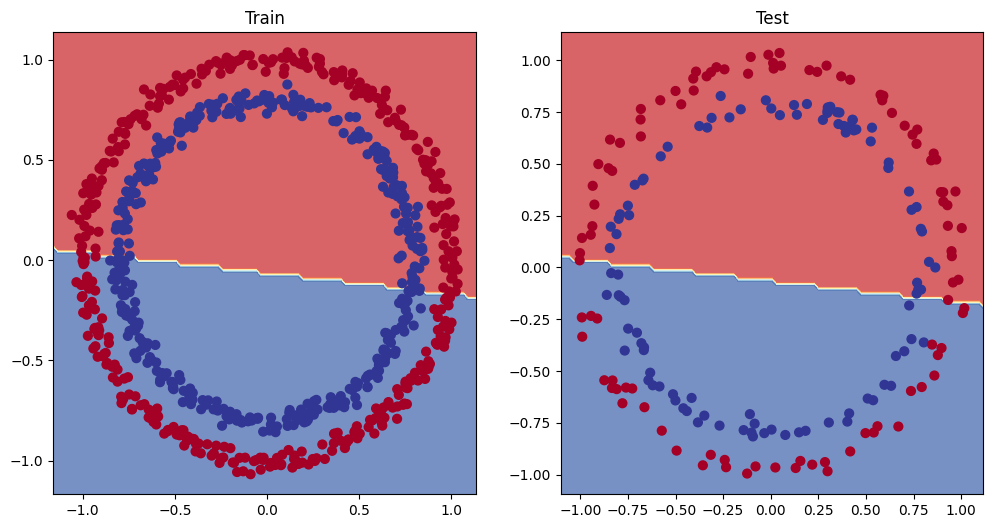

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving the model

Clearly we can see that we are trying to fit a circular data with a line. Which is not possible.

Ways to improve our model

* Add more layers - give the model more chances to learn about the patterns in the data
* Add more hidden layers units - go from 5 Hidden layer to 10 Hidden layers
* Fit for longer
* changing the activation function
* Changing the learning rate

These options are all from a model's prespective and changes are made in the model and not in the data.

And because these options are all values we (ML engineer and scientists) can change, they are referred as `hyperparameters`

In [25]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    # Or a faster method is
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
#Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

#Create a optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train the new model
epoch = 1000  #train the model for longer

#Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs+1):

  #training mode
  model_1.train()

  #1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate the loss/acc

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                 y_pred=y_pred)
  #3. Zero Grad
  optimizer.zero_grad()

  #4. Loss backpropagation
  loss.backward()

  #5. Step optimizer
  optimizer.step()

  ##Testing
  model_1.eval()

  with torch.inference_mode():

    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if(epoch%10 == 0):
    print(f"Epoch : {epoch} | loss : {loss:.4f} | acc : {acc:.2f}% | test_loss : {test_loss:.4f} | test_acc : {test_acc:.2f}%")


Epoch : 0 | loss : 0.6968 | acc : 41.00% | test_loss : 0.7019 | test_acc : 43.00%
Epoch : 10 | loss : 0.6965 | acc : 43.00% | test_loss : 0.7016 | test_acc : 45.50%
Epoch : 20 | loss : 0.6962 | acc : 43.88% | test_loss : 0.7013 | test_acc : 46.00%
Epoch : 30 | loss : 0.6960 | acc : 44.38% | test_loss : 0.7011 | test_acc : 46.50%
Epoch : 40 | loss : 0.6957 | acc : 45.62% | test_loss : 0.7008 | test_acc : 45.50%
Epoch : 50 | loss : 0.6955 | acc : 46.25% | test_loss : 0.7006 | test_acc : 47.00%
Epoch : 60 | loss : 0.6953 | acc : 46.62% | test_loss : 0.7004 | test_acc : 46.50%
Epoch : 70 | loss : 0.6951 | acc : 47.00% | test_loss : 0.7002 | test_acc : 46.50%
Epoch : 80 | loss : 0.6950 | acc : 47.38% | test_loss : 0.7000 | test_acc : 46.50%
Epoch : 90 | loss : 0.6948 | acc : 48.12% | test_loss : 0.6998 | test_acc : 46.50%
Epoch : 100 | loss : 0.6947 | acc : 48.50% | test_loss : 0.6997 | test_acc : 46.00%


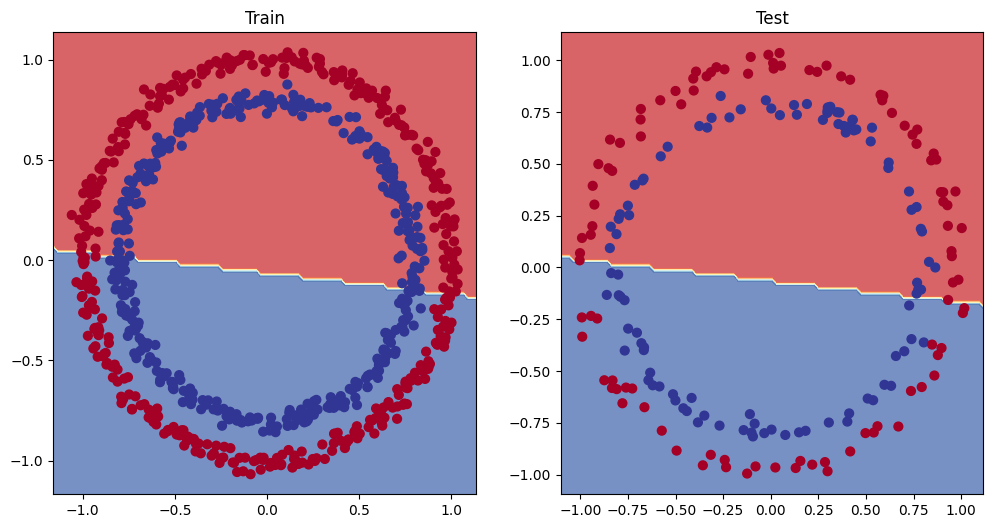

In [28]:
#Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

###5.1 Improving our model with Non-Linearity

We see that the dataset requires a nonlinear method to learn the non-linear pattern in data. So to do that we need to incorporate Non-Linear Activation Layers to get the result

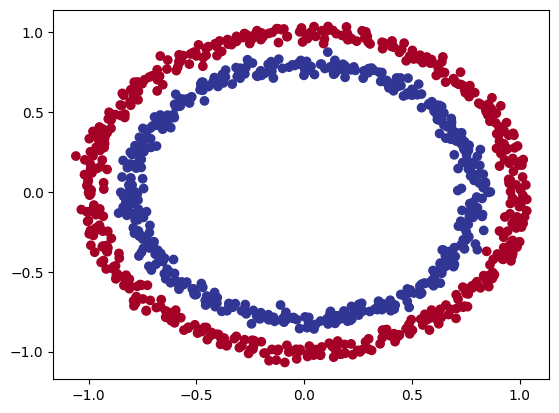

In [29]:
#Make and plot the data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [30]:
#Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

###5.2 Building a model with Non-Linearity

We are using ReLU non-linear activation function to introduce non-linearity to the model

In [31]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [32]:

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.LeakyReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

###5.3 Training the model and Testing

In [33]:
#Setup the loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs+1):

  model_3.train()
  #forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  #zero grad
  optimizer.zero_grad()

  #backprop
  loss.backward()

  #step optimizer
  optimizer.step()

  with torch.inference_mode():

    model_3.eval()
    #forward pass
    train_logits = model_3(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    test_loss = loss_fn(train_logits,
                        y_train)
    test_acc = accuracy_fn(y_true=y_train,
                           y_pred=train_pred)

  if epoch%100 == 0:
    print(f"Epoch {epoch} | Training loss {loss:.4f} | Training accuracy {acc}")
    print(f"  Test loss {test_loss:.4f} | Test accuracy {test_acc}")

Epoch 0 | Training loss 0.6929 | Training accuracy 48.5
  Test loss 0.6929 | Test accuracy 50.0
Epoch 100 | Training loss 0.6912 | Training accuracy 48.5
  Test loss 0.6912 | Test accuracy 52.75
Epoch 200 | Training loss 0.6898 | Training accuracy 48.5
  Test loss 0.6898 | Test accuracy 55.00000000000001
Epoch 300 | Training loss 0.6881 | Training accuracy 48.5
  Test loss 0.6880 | Test accuracy 52.75
Epoch 400 | Training loss 0.6853 | Training accuracy 48.5
  Test loss 0.6853 | Test accuracy 52.37500000000001
Epoch 500 | Training loss 0.6814 | Training accuracy 48.5
  Test loss 0.6813 | Test accuracy 53.0
Epoch 600 | Training loss 0.6758 | Training accuracy 48.5
  Test loss 0.6757 | Test accuracy 54.50000000000001
Epoch 700 | Training loss 0.6675 | Training accuracy 48.5
  Test loss 0.6674 | Test accuracy 58.25
Epoch 800 | Training loss 0.6533 | Training accuracy 48.5
  Test loss 0.6531 | Test accuracy 63.5
Epoch 900 | Training loss 0.6270 | Training accuracy 48.5
  Test loss 0.6267 |

### 5.4 Evaluation of model with Visualisation

In [35]:
#Make predictions
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(X_test)).squeeze()

y_pred[:5], y_test[:5]


(tensor([[0., 1.],
         [1., 1.],
         [0., 0.],
         [0., 1.],
         [1., 0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

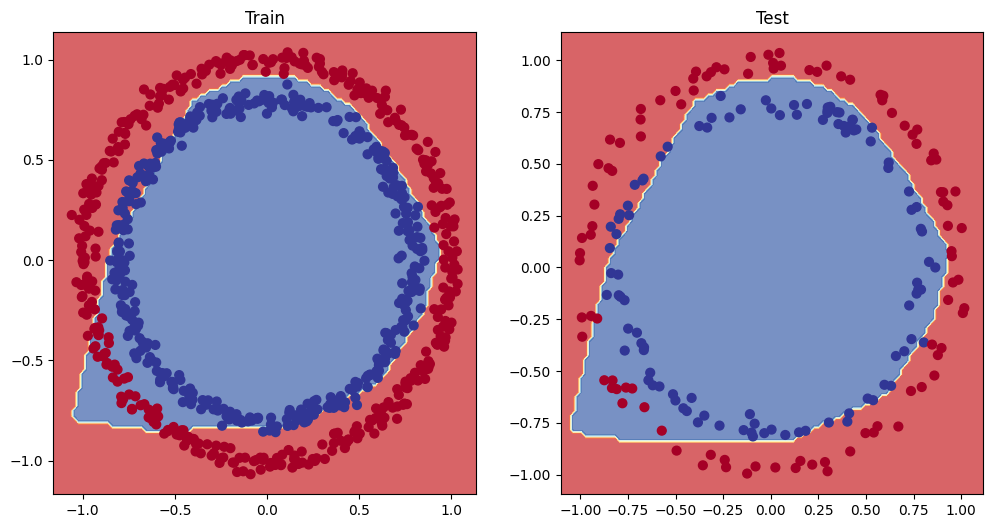

In [36]:
#Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

**Note** : The model is learning really slowly. Even after 100000 epochs we are getting 51% training accuracy. So increase the learning rate from 0.01-0.1

Here is the data for the last Train&test data
`Epoch 1000 | Training loss 0.5744 | Training accuracy 50.0
  Test loss 0.5737 | Test accuracy 87.0`

##6. Replicating non-Linear activation fucntion

For Neural Networks, rather than us telling the model what ot learn, we give it the tools to discover patterns in data and it tries to figure our the patterns on its own.

And these tools are Linear and Non-Linear function.

In [37]:
#Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

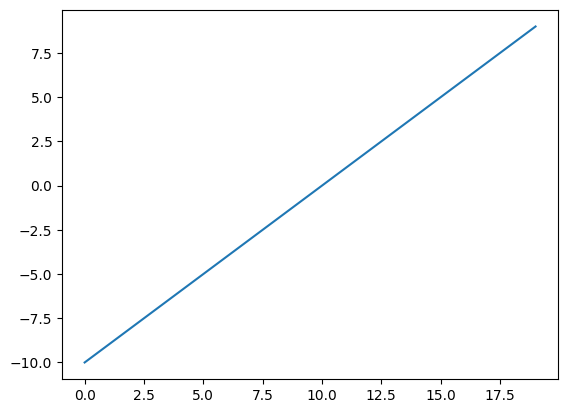

In [38]:
plt.plot(A)

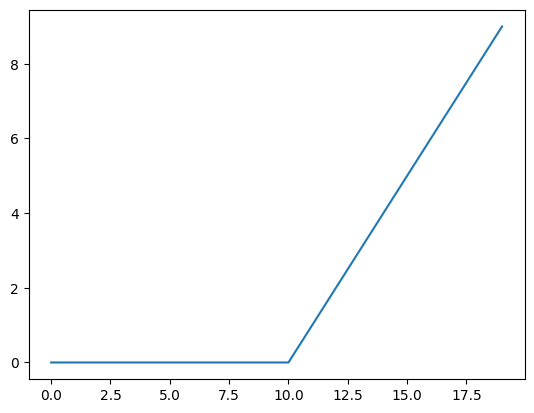

In [39]:
plt.plot(torch.relu(A))

In [40]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

z = relu(A)


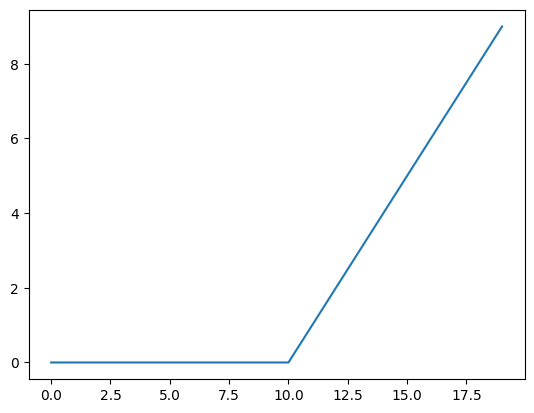

In [41]:
plt.plot(z)

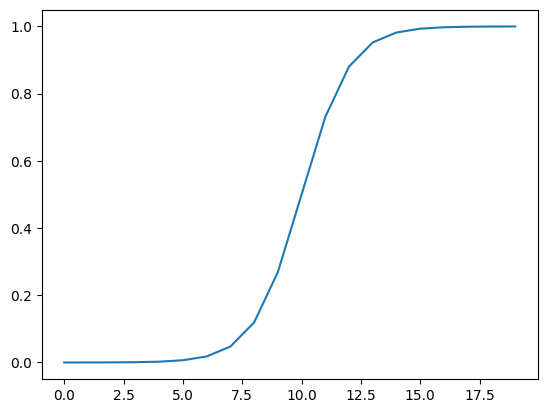

In [42]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/ (1 + torch.exp(-x))

plt.plot(sigmoid(A))

##7. Multi-class Classification Problem

* **Binary Classification** - involves 2 labels such as `spam-notspam`, `cat-dog etc`

* **Multi-Class Classification** - involves 2 or more labels to predict by the model such as `predicting digits(1 to 9)` or `predicting emotions (happy, sad, angry)`


###7.1 Creating toy multi-class dataset

sklearn make_blobs - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

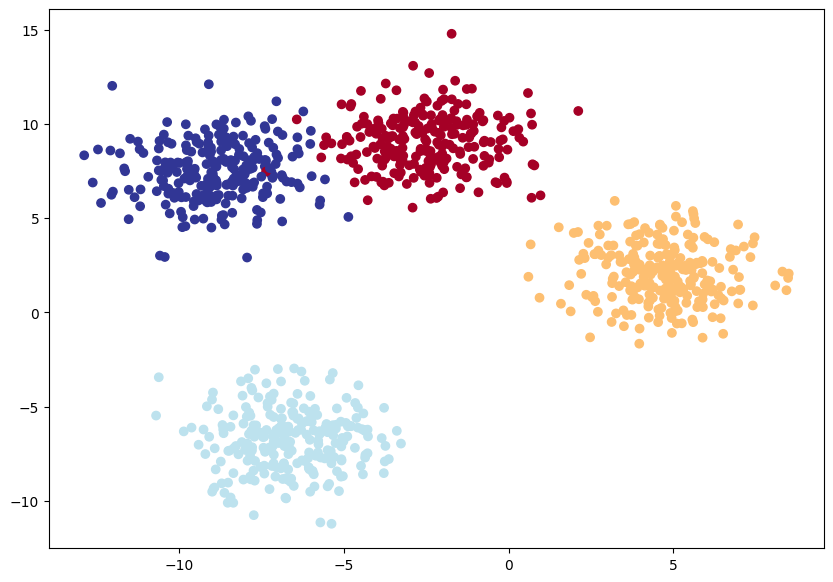

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set teh hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)  #***NOTE HERE WE HAVE USED LONGTENSOR TO AVOID ERRORS***

#3. Split into train and split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#4. Plot Data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


###7.2 Building a Multi-Class Classification Model in PyTorch

In [3]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
#Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model (docstring)

    Args:
        input_features(int) : Number of input features to the model
        output_features(int) : Number of output features to the model
        hidden_units(int) : Number of hidden units between layers, default 8

        Returns:

        Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear (in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear (in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear (in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [5]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

###7.3 Setting Loss function and optimizer  

In [6]:
#Loss function
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

#Calculate the accuracy - out of 100 examples, what percentage does out model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


###7.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate, train and test model, we need to convert model's outputs

raw logits -> prediction probabilities -> prediction labels

In [7]:
#lets get some raw logits from model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:5]

tensor([[-0.1441, -0.1474,  0.3066, -0.0147],
        [-0.3511,  0.3683, -0.3427,  0.2740],
        [-0.9651, -0.4427, -0.3351, -0.2279],
        [-0.2446, -0.1006,  0.3030, -0.0711],
        [-0.0707, -0.1371,  0.1260,  0.3515]], device='cuda:0')

In [8]:
#Convert our model's logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.1441, -0.1474,  0.3066, -0.0147],
        [-0.3511,  0.3683, -0.3427,  0.2740],
        [-0.9651, -0.4427, -0.3351, -0.2279],
        [-0.2446, -0.1006,  0.3030, -0.0711],
        [-0.0707, -0.1371,  0.1260,  0.3515]], device='cuda:0')
tensor([[0.2126, 0.2119, 0.3336, 0.2419],
        [0.1686, 0.3462, 0.1701, 0.3151],
        [0.1503, 0.2534, 0.2822, 0.3141],
        [0.1971, 0.2276, 0.3408, 0.2345],
        [0.2137, 0.2000, 0.2602, 0.3260]], device='cuda:0')


In [9]:
#Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 1, 3, 3, 2, 2,
        2, 3, 1, 3, 2, 3, 1, 2, 2, 1, 2, 3, 2, 1, 3, 2, 3, 1, 1, 3, 3, 3, 2, 2,
        3, 3, 2, 3, 2, 2, 1, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3,
        1, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1,
        2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 3,
        3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 1, 3, 3, 2, 2, 2, 3, 2, 3,
        3, 1, 3, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3,
        2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        2, 1, 3, 3, 1, 2, 3, 2], device='cuda:0')

###7.5 Creating a training loop and testing loop for a Multi-Class Pytorch model

In [10]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

#Put data in target device
X_blob_train,  y_blob_train,  = X_blob_train.to(device),  y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

  model_4.train()

  y_logits = model_4(X_blob_train).squeeze()
  y_pred  = torch.softmax(y_logits, dim=1).argmax(dim=1) #Remember to use argmax or you will get shape error

  loss = loss_fn(y_logits,
                 y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)  ### Note here we are using argmax as this is just a test and no backprop is required

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  if epoch%10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.3f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}%")


Epoch : 0 | Loss : 1.373 | Acc : 7.88% | Test Loss : 1.1456 | Test Acc : 40.00%
Epoch : 10 | Loss : 0.468 | Acc : 98.50% | Test Loss : 0.3743 | Test Acc : 99.00%
Epoch : 20 | Loss : 0.127 | Acc : 99.38% | Test Loss : 0.1083 | Test Acc : 99.50%
Epoch : 30 | Loss : 0.071 | Acc : 99.25% | Test Loss : 0.0604 | Test Acc : 99.50%
Epoch : 40 | Loss : 0.052 | Acc : 99.25% | Test Loss : 0.0435 | Test Acc : 99.50%
Epoch : 50 | Loss : 0.044 | Acc : 99.25% | Test Loss : 0.0350 | Test Acc : 99.50%
Epoch : 60 | Loss : 0.039 | Acc : 99.25% | Test Loss : 0.0300 | Test Acc : 99.50%
Epoch : 70 | Loss : 0.035 | Acc : 99.25% | Test Loss : 0.0266 | Test Acc : 99.50%
Epoch : 80 | Loss : 0.033 | Acc : 99.25% | Test Loss : 0.0242 | Test Acc : 99.50%
Epoch : 90 | Loss : 0.032 | Acc : 99.25% | Test Loss : 0.0225 | Test Acc : 99.50%


Note on error found: `RuntimeError: expected scalar type Long but found Float`

`#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)`

Here y_blob has to be LongTensor and not float32

###7.6 Evaluating the data of predictions with a PyTorch multi-class model

In [11]:
#Make predictions

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

#Convert logits -> prediction prob
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5], y_logits[:5]

(tensor([[1.2233e-03, 9.9849e-01, 2.3472e-04, 5.4971e-05],
         [3.1909e-03, 1.2879e-05, 1.3310e-03, 9.9547e-01],
         [2.4909e-05, 2.2383e-04, 9.9717e-01, 2.5848e-03],
         [4.1026e-03, 9.8972e-01, 5.0703e-03, 1.1096e-03],
         [9.9727e-01, 2.4481e-03, 1.3138e-05, 2.6471e-04]], device='cuda:0'),
 tensor([[-2.0209,  4.6838, -3.6717, -5.1233],
         [-0.2748, -5.7873, -1.1492,  5.4681],
         [-5.8861, -3.6904,  4.7114, -1.2439],
         [-2.1776,  3.3082, -1.9658, -3.4852],
         [ 6.1309,  0.1212, -5.1064, -2.1032]], device='cuda:0'))

In [12]:
#Convert prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5], y_blob_test[:5]

(tensor([1, 3, 2, 1, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0], device='cuda:0'))

NameError: name 'plot_decision_boundary' is not defined

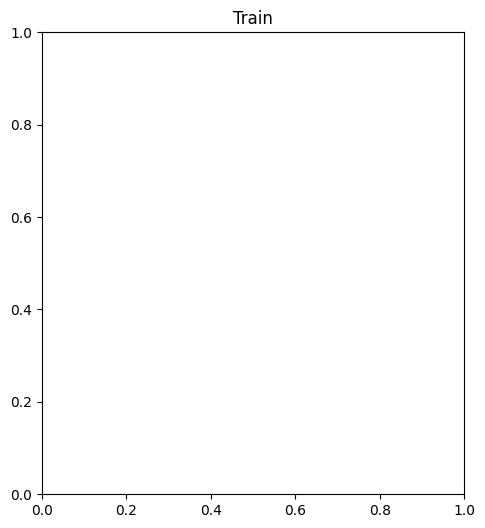

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

###8. More Metrics in Classification

Some of the important metrics are:

* Accuracy -
* Precision -
* Recall -
* F1-score
* Confusion matrix
* Classification report

Difference between accuracy, precision and recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c


In [14]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from torchmetrics import Accuracy

torchmetrics_acc = Accuracy().to("cuda")

torchmetrics_acc(y_preds, y_blob_test)